# BLACK FRIDAY DATASET EDA AND FEATURE ENGINEERING
## CLEANING AND PREPARING THE DATA FOR MODEL TRAINING


In [1]:
#dataset link:https://www.kaggle.com/datasets/sdolezel/black-friday
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement:
Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [266]:
#importing the training dataset

df_train=pd.read_csv("train.csv")
df_train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [267]:
#importing the test dataset
df_test=pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [268]:
#merge both train and test data
df=df_train.append(df_test)

C:\Users\VJTIAD\AppData\Local\Temp\ipykernel_5484\4047838133.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


In [153]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [31]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [269]:
df.drop(['User_ID'],axis=1,inplace=True)
df.drop(['Product_ID'],axis=1,inplace=True)

In [270]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [271]:
#df['Gender']=df['Gender'].replace('F',1,inplace=True)
#df['Gender']=df['Gender'].replace('M',0,inplace=True)
#df.head()
#replace(0, 'Female')

# handling categorical feature 'Gender'
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [272]:
# handling categorical feature 'Age'
df['Age'].value_counts().sort_values(ascending=False)
#df['Age'].unique()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [273]:
df['Age']=df['Age'].map({"0-17":1, "18-25":2, "26-35":3, "36-45":4, "46-50":5, "51-55":6, "55+":7})


In [274]:
df['Age'].unique()


array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [275]:
df.head(30)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0
5,1,3,15,A,3,0,1,2.0,NaN,15227.0
6,1,5,7,B,2,1,1,8.0,17.0,19215.0
7,1,5,7,B,2,1,1,15.0,NaN,15854.0
8,1,5,7,B,2,1,1,16.0,NaN,15686.0
9,1,3,20,A,1,1,8,NaN,NaN,7871.0


In [276]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [278]:
df['City_Category']=df['City_Category'].replace({"A":1, "B":2, "C":3})
df['City_Category'].value_counts()

2    329739
3    243684
1    210244
Name: City_Category, dtype: int64

In [279]:
# MISSING VALUE:
df.isnull().sum().sort_values(ascending=False)*100/len(df)

Product_Category_3            69.648078
Product_Category_2            31.388587
Purchase                      29.808452
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
dtype: float64

In [280]:
#focus on replacing missing values
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [118]:
df['Product_Category_3'].mode()[0]

16.0

In [281]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [282]:
df['Product_Category_3'].isnull().sum()

0

In [115]:
df['Product_Category_2'].value_counts()



8.0     91318
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [113]:
df['Product_Category_2'].mode()[0]


8.0

In [283]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [284]:
df['Product_Category_2'].isnull().sum()

0

In [183]:
df['Purchase'].value_counts()

7011.0     233790
7193.0        188
6855.0        187
6891.0        184
7012.0        183
            ...  
23491.0         1
18345.0         1
3372.0          1
855.0           1
21489.0         1
Name: Purchase, Length: 18105, dtype: int64

In [285]:
#df['Purchase']=df['Purchase'].fillna(df['Purchase'].mode()[0])
df['Purchase'].isnull().sum()

233599

In [286]:
df.shape

(783667, 10)

In [287]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [288]:
df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\VJTIAD\AppData\Local\Temp\ipykernel_5484\3097934778.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'].str.replace('+','')


0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [290]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


C:\Users\VJTIAD\AppData\Local\Temp\ipykernel_5484\1612830013.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [291]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  uint8  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(1), uint8(1)
memory usage: 60.5+ MB


In [293]:
# convert object ( Stay_In_Current_City_Years  783667 non-null  object ) in integers
# convert gender uint to int
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)


In [294]:
df['Gender']=df['Gender'].astype(int)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(5)
memory usage: 59.8 MB


In [296]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

C:\Users\VJTIAD\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

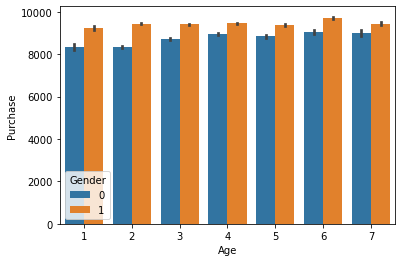

In [297]:
#visualisation of age vs purchase
sns.barplot('Age','Purchase',hue='Gender',data=df)

# Observation:
### purchase of men is high as compared to women


C:\Users\VJTIAD\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

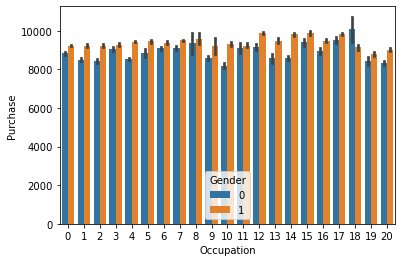

In [298]:
#Visualization of purchase vs occupation

sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\VJTIAD\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

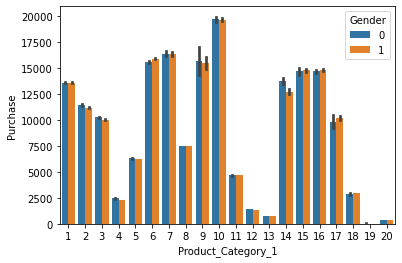

In [299]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\VJTIAD\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

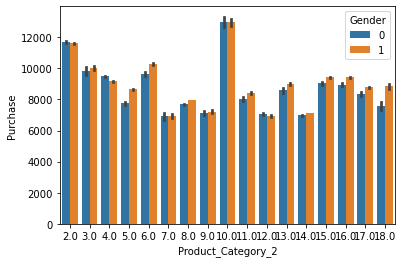

In [178]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\VJTIAD\anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

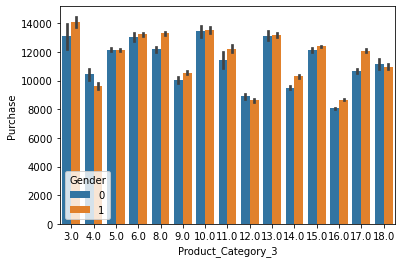

In [300]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [304]:
##Feature scaling
df_test=df[df['Purchase'].isnull()]
df_test.head()



,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,5,7,2,2,1,1,11.0,16.0,NaN
1,1,3,17,3,0,0,3,5.0,16.0,NaN
2,0,4,1,2,4,1,5,14.0,16.0,NaN
3,0,4,1,2,4,1,4,9.0,16.0,NaN
4,0,3,1,3,1,0,4,5.0,12.0,NaN


In [305]:
df_train=df[~df['Purchase'].isnull()]
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [306]:
df_test.shape

(233599, 10)

In [307]:
df_train.shape

(550068, 10)

In [308]:
X=df_train[: :-1]
X.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550067,0,5,0,2,4,1,20,8.0,16.0,490.0
550066,0,7,1,3,2,0,20,8.0,16.0,365.0
550065,0,3,15,2,4,1,20,8.0,16.0,137.0
550064,0,3,1,3,3,0,20,8.0,16.0,371.0
550063,1,6,13,2,1,1,20,8.0,16.0,368.0


In [309]:
X.shape

(550068, 10)

In [310]:
y=df_train['Purchase']
y.head()


0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [311]:
y.shape

(550068,)

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [314]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)